In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [110]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_data.csv to train_data (2).csv
User uploaded file "train_data.csv" with length 70821 bytes


In [111]:
df = pd.read_csv('train_data.csv')
df.head()

,a_fullVisitorId,a_hits_customDimensions_value,a_COUNT,a_SUM_totals_pageviews,a_SUM_totals_hits,a_SUM_totals_timeOnSite,a_SUM_hits_hitNumber,a_diffdays_latest,a_diffdays_oldest,a_desktop_flag,...,a_OS_Macintosh_flag,a_SUM_morning_visit,a_SUM_daytime_visit,a_SUM_evening_visit,a_SUM_midnight_visit,a_page201404,a_page201405,a_page201406,b_hits_customDimensions_value,b_CV_flag
0,1,1,4,5,10,34,4,24,27,1,...,0,0,1,0,3,0,0,0,1,0
1,2,2,1,1,2,1,1,24,24,1,...,0,0,0,1,0,0,0,0,2,0
2,3,3,1,1,2,1,1,24,24,1,...,0,1,0,0,0,0,0,0,3,0
3,4,4,3,4,8,97,5,11,42,1,...,0,0,0,0,3,0,0,0,4,0
4,5,5,1,1,2,2,1,24,24,1,...,0,0,1,0,0,0,0,0,5,0


In [112]:
df.shape

(1295, 23)

In [0]:
df = df.drop(['a_fullVisitorId', 'a_hits_customDimensions_value'], axis=1)

In [114]:
dataset = df.values
len(dataset)

1295

In [151]:
X = dataset[:,0:19]
Y = dataset[:,20]
X

array([[ 4,  5, 10, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       ...,
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0]])

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(X[0:1,:])


[[ 2.114  0.268  0.486 -0.063  0.58   0.069  0.242  0.164 -0.115 -0.115
   0.267 -0.215 -0.378  0.369 -0.471  7.038 -0.191 -0.122 -0.074]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.33, random_state=42)

In [118]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV()
lr.fit(trainX, trainY)
pred_y = lr.predict(testX)
print("Test fraction correct (LR-Accuracy) = {:.2f}".format(lr.score(testX, testY)))

Test fraction correct (LR-Accuracy) = 0.89


In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY, pred_y)
print(confusion_matrix)

[[363   5]
 [ 44  16]]


## Deep Learning

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [0]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values

In [0]:
model = Sequential()
model.add(Dense(16, input_shape=(19,)))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [123]:
model.fit(trainX, trainY, verbose=1, batch_size=1)
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Epoch 1/1
867/867 [==============================] - 2s 2ms/step - loss: 0.3635 - acc: 0.8570
Test fraction correct (NN-Score) = 0.34
Test fraction correct (NN-Accuracy) = 0.86


In [0]:
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras import optimizers

model = Sequential()
model.add(Dense(16,
                input_shape=(19,), 
                activation="relu",
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))



model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizers.RMSprop(lr=0.001))

In [0]:
history = model.fit(trainX, trainY, verbose=0, batch_size=1, epochs=40, validation_data=(testX, testY))

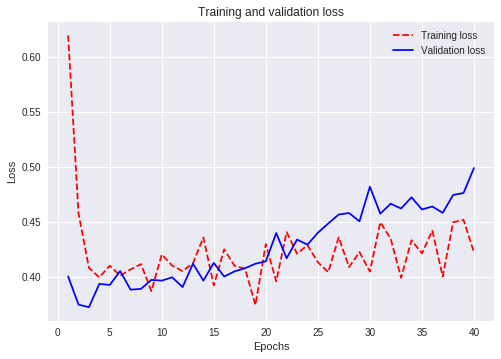

In [126]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

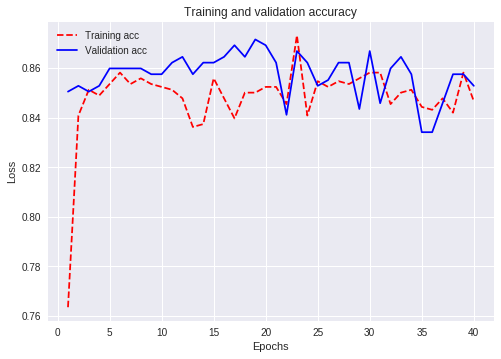

In [127]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [128]:
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Score) = 0.50
Test fraction correct (NN-Accuracy) = 0.85


In [0]:
pred_y = model.predict(testX)
#np.round(pred_y, 2)

In [130]:
y_test_class = np.argmax(testY,axis=1)
y_pred_class = np.argmax(pred_y,axis=1)

print(y_test_class)
print(y_pred_class)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [131]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.87      0.97      0.92       368
          1       0.42      0.13      0.20        60

avg / total       0.81      0.85      0.82       428

[[357  11]
 [ 52   8]]


In [0]:
cm = confusion_matrix(y_test_class,y_pred_class)

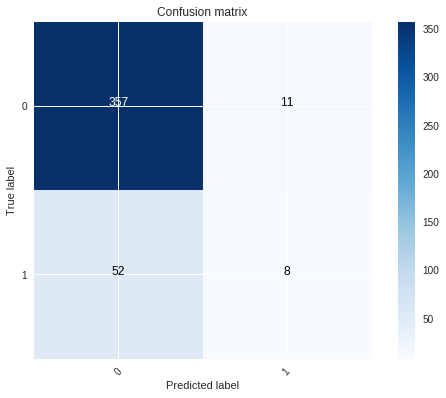

In [133]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
   
import itertools
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)

In [134]:
print('We have detected ' + str(cm[1][1]) + ' conversions / ' + str(cm[1][1]+cm[1][0]) + ' total conversions.')
print('\nSo, the probability to detect a conversions is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 8 conversions / 60 total conversions.

So, the probability to detect a conversions is 0.13333333333333333
the accuracy is : 0.852803738317757


### Resampling

In [135]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.3.3)
Requirement not upgraded as not directly required: scikit-learn in /usr/local/lib/python3.6/dist-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: scipy in /usr/local/lib/python3.6/dist-packages (from imbalanced-learn) (0.19.1)
Requirement not upgraded as not directly required: numpy in /usr/local/lib/python3.6/dist-packages (from imbalanced-learn) (1.14.5)


In [0]:
from imblearn.over_sampling import SMOTE, ADASYN


In [0]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
trainX, trainY = SMOTE().fit_sample(trainX, trainY)

(array([742.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 742.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

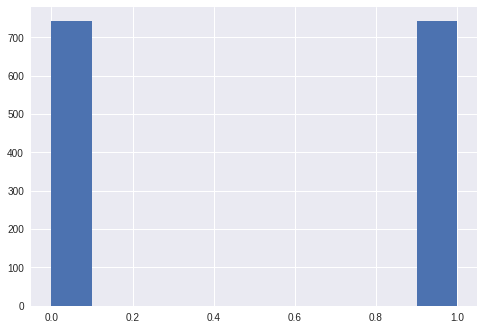

In [139]:
plt.hist(trainY)

In [0]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values

In [0]:
model = Sequential()
model.add(Dense(16,
                input_shape=(19,), 
                activation="sigmoid",
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))



model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

history = model.fit(trainX, trainY, verbose=0, batch_size=1, epochs=40, validation_data=(testX, testY))

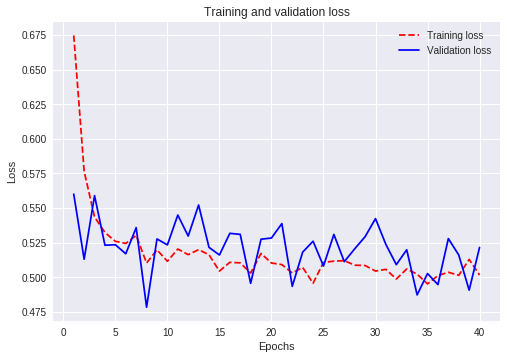

In [142]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

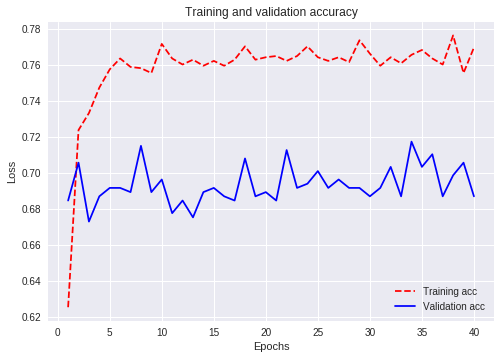

In [143]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [144]:
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Score) = 0.52
Test fraction correct (NN-Accuracy) = 0.69


## CV

In [145]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []
for train, test in kfold.split(X, Y):
  print(X)
  print(Y)

[[ 2.114  0.268  0.486 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 ...
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]]
[0 0 0 ... 0 0 0]
[[ 2.114  0.268  0.486 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 ...
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]]
[0 0 0 ... 0 0 0]
[[ 2.114  0.268  0.486 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 ...
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]
 [-0.245 -0.113 -0.158 ... -0.191 -0.122 -0.074]]
[0 0 0 ... 0 0 0]
[[ 2.114  0.268  0.486 ... -0.191 -0.122 -0.07

In [155]:
# define 10-fold cross validation test harness
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []

for train, test in kfold.split(X, Y):
  
  trainY = pd.get_dummies(Y[train]).values
  testY = pd.get_dummies(Y[test]).values

  # create model
  model = Sequential()
  model.add(Dense(16,
                  input_shape=(19,), 
                  activation="sigmoid",
                  kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation="softmax"))



  model.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],
                optimizer='adam')

  history = model.fit(X[train], trainY, verbose=0, batch_size=1, epochs=40, validation_data=(X[test], testY))
  
  scores = model.evaluate(X[test], testY, verbose=0)
	
  
	#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)



NameError: ignored

In [156]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

85.95% (+/- 0.75%)


In [165]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

def create_model():
  model = Sequential()
  model.add(Dense(16,
                  input_shape=(19,), 
                  activation="sigmoid",
                  kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation="softmax"))



  model.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],
                optimizer='adam')


# https://medium.com/@literallywords/stratified-k-fold-with-keras-e57c487b1416
# Instantiate the cross validator
skf = StratifiedKFold(n_splits=10, shuffle=True)
# Loop through the indices the split() method returns
for index, (train_indices, val_indices) in enumerate(skf.split(X, Y)):
    print ("Training on fold " + str(index+1) + "/10...")
    # Generate batches from indices
    xtrain, xval = X[train_indices], X[val_indices]
    ytrain, yval = Y[train_indices], Y[val_indices]
    
    ytrain = pd.get_dummies(ytrain).values
    yval = pd.get_dummies(yval).values
    
    # Clear model, and create it
    model = Sequential()
    model.add(Dense(16,
                    input_shape=(19,), 
                    activation="sigmoid",
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation="softmax"))



    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  optimizer='adam')
    
    best_weights_filepath = './best_weights.hdf5'
    earlyStopping= EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(best_weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    
    # Debug message I guess
    print ("Training new iteration on " + str(xtrain.shape[0]) + " training samples, " + str(xval.shape[0]) + " validation samples, this may be a while...")
    
    #history = model.fit(xtrain, ytrain, xval, yval)
    history = model.fit(xtrain, ytrain, verbose=0, batch_size=1, epochs=40, validation_data=(xval, yval), callbacks=[earlyStopping, saveBestModel])
    accuracy_history = history.history['acc']
    val_accuracy_history = history.history['val_acc']
    print ("Last training accuracy: " + str(accuracy_history[-1]) + ", last validation accuracy: " + str(val_accuracy_history[-1]))

Training on fold 1/10...
Training new iteration on 1165 training samples, 130 validation samples, this may be a while...

Epoch 00001: val_loss improved from inf to 0.36889, saving model to ./best_weights.hdf5

Epoch 00002: val_loss improved from 0.36889 to 0.35786, saving model to ./best_weights.hdf5

Epoch 00003: val_loss improved from 0.35786 to 0.35684, saving model to ./best_weights.hdf5

Epoch 00004: val_loss improved from 0.35684 to 0.35495, saving model to ./best_weights.hdf5

Epoch 00005: val_loss improved from 0.35495 to 0.35317, saving model to ./best_weights.hdf5

Epoch 00006: val_loss improved from 0.35317 to 0.35072, saving model to ./best_weights.hdf5

Epoch 00007: val_loss improved from 0.35072 to 0.34963, saving model to ./best_weights.hdf5

Epoch 00008: val_loss improved from 0.34963 to 0.34886, saving model to ./best_weights.hdf5

Epoch 00009: val_loss improved from 0.34886 to 0.34707, saving model to ./best_weights.hdf5

Epoch 00010: val_loss improved from 0.34707 t


Epoch 00017: val_loss did not improve from 0.31761

Epoch 00018: val_loss did not improve from 0.31761

Epoch 00019: val_loss did not improve from 0.31761

Epoch 00020: val_loss did not improve from 0.31761

Epoch 00021: val_loss did not improve from 0.31761

Epoch 00022: val_loss did not improve from 0.31761

Epoch 00023: val_loss improved from 0.31761 to 0.31719, saving model to ./best_weights.hdf5

Epoch 00024: val_loss improved from 0.31719 to 0.31364, saving model to ./best_weights.hdf5

Epoch 00025: val_loss did not improve from 0.31364

Epoch 00026: val_loss did not improve from 0.31364

Epoch 00027: val_loss did not improve from 0.31364

Epoch 00028: val_loss improved from 0.31364 to 0.31330, saving model to ./best_weights.hdf5

Epoch 00029: val_loss did not improve from 0.31330

Epoch 00030: val_loss did not improve from 0.31330

Epoch 00031: val_loss improved from 0.31330 to 0.31299, saving model to ./best_weights.hdf5

Epoch 00032: val_loss improved from 0.31299 to 0.30941,


Epoch 00014: val_loss did not improve from 0.34806

Epoch 00015: val_loss did not improve from 0.34806

Epoch 00016: val_loss did not improve from 0.34806

Epoch 00017: val_loss did not improve from 0.34806

Epoch 00018: val_loss did not improve from 0.34806

Epoch 00019: val_loss did not improve from 0.34806

Epoch 00020: val_loss did not improve from 0.34806
Epoch 00020: early stopping
Last training accuracy: 0.8600858369098713, last validation accuracy: 0.8615384615384616
Training on fold 5/10...
Training new iteration on 1165 training samples, 130 validation samples, this may be a while...

Epoch 00001: val_loss improved from inf to 0.38286, saving model to ./best_weights.hdf5

Epoch 00002: val_loss improved from 0.38286 to 0.37014, saving model to ./best_weights.hdf5

Epoch 00003: val_loss improved from 0.37014 to 0.36400, saving model to ./best_weights.hdf5

Epoch 00004: val_loss did not improve from 0.36400

Epoch 00005: val_loss did not improve from 0.36400

Epoch 00006: val_l


Epoch 00017: val_loss did not improve from 0.33654

Epoch 00018: val_loss did not improve from 0.33654

Epoch 00019: val_loss did not improve from 0.33654

Epoch 00020: val_loss did not improve from 0.33654

Epoch 00021: val_loss did not improve from 0.33654
Epoch 00021: early stopping
Last training accuracy: 0.8584905660377359, last validation accuracy: 0.8527131782945736
Training on fold 7/10...
Training new iteration on 1166 training samples, 129 validation samples, this may be a while...

Epoch 00001: val_loss improved from inf to 0.35324, saving model to ./best_weights.hdf5

Epoch 00002: val_loss improved from 0.35324 to 0.32631, saving model to ./best_weights.hdf5

Epoch 00003: val_loss improved from 0.32631 to 0.30982, saving model to ./best_weights.hdf5

Epoch 00004: val_loss improved from 0.30982 to 0.30045, saving model to ./best_weights.hdf5

Epoch 00005: val_loss improved from 0.30045 to 0.29559, saving model to ./best_weights.hdf5

Epoch 00006: val_loss improved from 0.29


Epoch 00006: val_loss did not improve from 0.32587

Epoch 00007: val_loss did not improve from 0.32587

Epoch 00008: val_loss did not improve from 0.32587

Epoch 00009: val_loss did not improve from 0.32587

Epoch 00010: val_loss did not improve from 0.32587

Epoch 00011: val_loss did not improve from 0.32587

Epoch 00012: val_loss did not improve from 0.32587

Epoch 00013: val_loss did not improve from 0.32587

Epoch 00014: val_loss did not improve from 0.32587

Epoch 00015: val_loss did not improve from 0.32587
Epoch 00015: early stopping
Last training accuracy: 0.8567753001715266, last validation accuracy: 0.8604651162790697
Training on fold 9/10...
Training new iteration on 1166 training samples, 129 validation samples, this may be a while...

Epoch 00001: val_loss improved from inf to 0.33688, saving model to ./best_weights.hdf5

Epoch 00002: val_loss improved from 0.33688 to 0.31531, saving model to ./best_weights.hdf5

Epoch 00003: val_loss improved from 0.31531 to 0.30120, sav


Epoch 00002: val_loss improved from 0.36705 to 0.35157, saving model to ./best_weights.hdf5

Epoch 00003: val_loss improved from 0.35157 to 0.33551, saving model to ./best_weights.hdf5

Epoch 00004: val_loss improved from 0.33551 to 0.33129, saving model to ./best_weights.hdf5

Epoch 00005: val_loss improved from 0.33129 to 0.32997, saving model to ./best_weights.hdf5

Epoch 00006: val_loss improved from 0.32997 to 0.32538, saving model to ./best_weights.hdf5

Epoch 00007: val_loss did not improve from 0.32538

Epoch 00008: val_loss did not improve from 0.32538

Epoch 00009: val_loss did not improve from 0.32538

Epoch 00010: val_loss improved from 0.32538 to 0.32512, saving model to ./best_weights.hdf5

Epoch 00011: val_loss improved from 0.32512 to 0.31903, saving model to ./best_weights.hdf5

Epoch 00012: val_loss improved from 0.31903 to 0.31880, saving model to ./best_weights.hdf5

Epoch 00013: val_loss improved from 0.31880 to 0.31334, saving model to ./best_weights.hdf5

Epoch 

In [0]:
# https://machinelearningmastery.com/check-point-deep-learning-models-keras/

In [167]:
!ls

best_weights.hdf5  train_data (1).csv  train_data.csv
datalab		   train_data (2).csv
